In [1]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
# Download latest version
# path = kagglehub.dataset_download("atharvasoundankar/global-food-wastage-dataset-2018-2024")

C:\Users\Artur\PycharmProjects\veronika_python\datascience\my_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('1/global_food_wastage_dataset.csv')
df.head()

,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64
1,Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61
2,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
3,France,2023,Fruits & Vegetables,46299.69,40551.22,120.19,953.05,31.91
4,France,2023,Beverages,33096.57,36980.82,104.74,1105.47,36.06


In [3]:
df.shape

(5000, 8)

In [4]:
df.describe()

,Year,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2021.015600,25061.780072,25039.703870,109.46397,706.606416,50.060890
std,1.999239,14245.119588,14620.236429,51.93373,402.546464,11.596203
min,2018.000000,502.610000,406.690000,20.09000,11.290000,30.020000
25%,2019.000000,12783.737500,12612.477500,64.05000,350.602500,40.012500
50%,2021.000000,24865.220000,24428.155000,110.08000,713.530000,50.295000
75%,2023.000000,37471.035000,37146.037500,154.52500,1057.255000,60.125000
max,2024.000000,49990.760000,59228.930000,199.97000,1399.970000,70.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    5000 non-null   object 
 1   Year                       5000 non-null   int64  
 2   Food Category              5000 non-null   object 
 3   Total Waste (Tons)         5000 non-null   float64
 4   Economic Loss (Million $)  5000 non-null   float64
 5   Avg Waste per Capita (Kg)  5000 non-null   float64
 6   Population (Million)       5000 non-null   float64
 7   Household Waste (%)        5000 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 312.6+ KB


In [6]:
df.Year.value_counts()

Year
2023    737
2021    734
2020    731
2024    721
2018    708
2019    691
2022    678
Name: count, dtype: int64

In [7]:
df_sorted= df.sort_values(by='Country')
df_sorted = df_sorted.groupby(['Country', 'Year'], as_index=False)[['Population (Million)', 'Economic Loss (Million $)']].mean()
df_sorted.tail()

,Country,Year,Population (Million),Economic Loss (Million $)
135,USA,2020,649.791667,23884.319667
136,USA,2021,708.733929,25170.665714
137,USA,2022,736.858261,26753.353043
138,USA,2023,756.794444,24431.640556
139,USA,2024,760.172143,22462.688333


Text(0.5, 1.0, 'Relationship between Total Waste and Economic Loss')

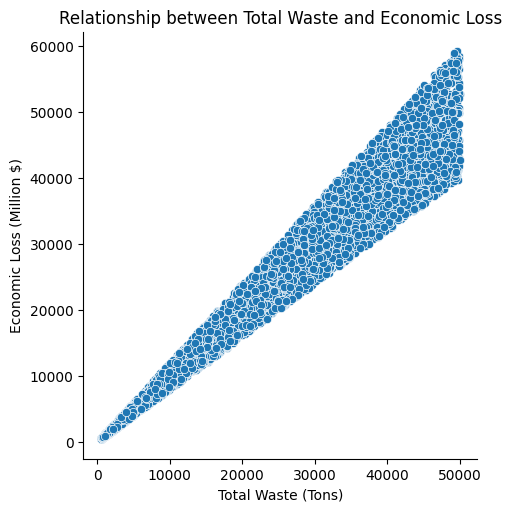

In [8]:
sns.relplot(data=df, x="Total Waste (Tons)", y="Economic Loss (Million $)")
plt.title('Relationship between Total Waste and Economic Loss')

In [9]:
df.Country.unique()

array(['Australia', 'Indonesia', 'Germany', 'France', 'India', 'China',
       'UK', 'South Africa', 'Japan', 'USA', 'Brazil', 'Saudi Arabia',
       'Italy', 'Spain', 'Mexico', 'Argentina', 'Canada', 'South Korea',
       'Russia', 'Turkey'], dtype=object)

In [10]:
unique_cat = df['Food Category'].unique()
cat_amount = df['Food Category'].value_counts()
print('Food Categories:', unique_cat)
print('Amount of each Category:', cat_amount)

Food Categories: ['Fruits & Vegetables' 'Prepared Food' 'Dairy Products' 'Beverages'
 'Meat & Seafood' 'Grains & Cereals' 'Frozen Food' 'Bakery Items']
Amount of each Category: Food Category
Prepared Food          711
Beverages              639
Bakery Items           630
Fruits & Vegetables    620
Dairy Products         616
Meat & Seafood         605
Frozen Food            596
Grains & Cereals       583
Name: count, dtype: int64


<Axes: xlabel='Economic Loss (Million $)', ylabel='Food Category'>

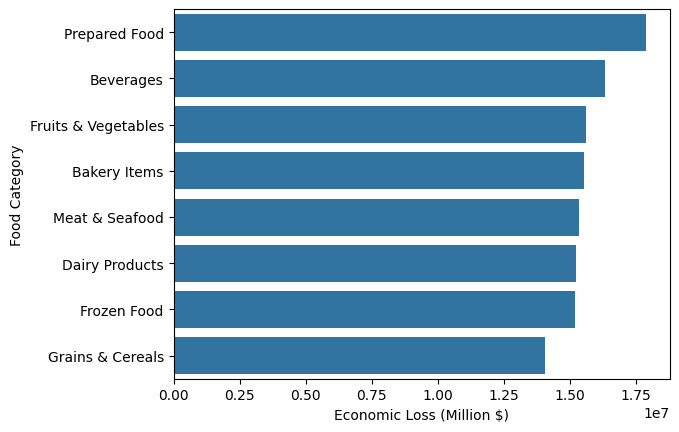

In [11]:
df_category = pd.DataFrame(df.groupby('Food Category')['Economic Loss (Million $)'].sum())
df_category = df_category.sort_values(by='Economic Loss (Million $)', ascending=False)
sns.barplot(df_category, x="Economic Loss (Million $)", y="Food Category")

In [12]:
df.corr(numeric_only=True)

,Year,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
Year,1.000000,0.003452,0.002113,0.013716,0.008015,-0.013416
Total Waste (Tons),0.003452,1.000000,0.974522,0.019987,0.024048,0.010367
Economic Loss (Million $),0.002113,0.974522,1.000000,0.017097,0.022253,0.006167
Avg Waste per Capita (Kg),0.013716,0.019987,0.017097,1.000000,-0.029190,-0.019394
Population (Million),0.008015,0.024048,0.022253,-0.029190,1.000000,-0.004848
Household Waste (%),-0.013416,0.010367,0.006167,-0.019394,-0.004848,1.000000


In [13]:
df_test = df[df['Food Category'] == 'Prepared Food'].groupby('Food Category')['Economic Loss (Million $)'].sum()
df_test

Food Category
Prepared Food    17878643.94
Name: Economic Loss (Million $), dtype: float64

In [20]:
from dash import Dash, html, dash_table, dcc, callback, Output, Input
import pandas as pd
import plotly.express as px

# Initialize the app
app = Dash()

years = {}
for i in range(2018, 2025):
    years[i] = str(i)

countries_options = [{'label': 'All Countries', 'value': 'ALL'}]
countries = df.Country.unique()
for i in range(len(countries)):
    countries_options.append({'label': countries[i], 'value': countries[i]})

# App layout
app.layout = [
    html.H1('Global Food Wastage',
        style={'textAlign': 'center', 'color': '#503D36','font-size': 40}),
    html.P("Years:"),
    dcc.RangeSlider(id='year-slider', min=2018, max=2024, step=1, marks=years, 
            value=[2018, 2024]),
    dcc.Dropdown(id='country-dropdown',  value='ALL', searchable=True,
                                placeholder='Select a Country',
                                options=countries_options),
    html.Br(), 
    html.Div(dcc.Graph(id='category-hist', figure={})),
    html.Br(), 
    html.Div(dcc.Graph(id='total-waste-pie')),
    html.Br(), 
    html.Div(dcc.Graph(id='avg-waste-bar')),
    html.Br(),
]
@app.callback(Output(component_id='category-hist', component_property='figure'),
              [Input(component_id='country-dropdown', component_property='value'), 
              Input(component_id="year-slider", component_property="value")])

def update_hist(selected_country, selected_years):
    data = filter_by_year(selected_years, df)
    df_category = pd.DataFrame(data.groupby(['Food Category'], as_index=False)['Total Waste (Tons)'].sum())
    if selected_country == 'ALL':
        fig = px.histogram(df_category, x='Food Category', y='Total Waste (Tons)',
                           title='Global Food Wastage by Category for year' + format_years(selected_years))
        return fig
    else:
        filtered_df = data[data['Country'] == selected_country]
        df_category = pd.DataFrame(filtered_df.groupby(['Food Category'], as_index=False)['Total Waste (Tons)'].sum())
        fig = px.histogram(df_category, x='Food Category', y='Total Waste (Tons)',
                           title='Food Wastage of ' + 
                           selected_country + 
                           ' by Category for year' + format_years(selected_years))
        return fig

@app.callback(Output(component_id='total-waste-pie', component_property='figure'),
              [Input(component_id='country-dropdown', component_property='value'), 
              Input(component_id="year-slider", component_property="value")])

def update_pie(selected_country, selected_years):
    data = filter_by_year(selected_years, df)
    df_country = pd.DataFrame(data.groupby(['Country'], as_index=False)['Economic Loss (Million $)'].sum())
    if selected_country == 'ALL':
        fig = px.pie(df_country, values='Economic Loss (Million $)', 
                     names='Country', 
                     title='Global Economic Loss for year' + format_years(selected_years))
        return fig
    else:
        filtered_df = data[data['Country'] == selected_country]
        fig = px.pie(filtered_df, names='Food Category', 
                     values='Economic Loss (Million $)', 
                     title='Economic Loss of ' + selected_country + ' by Category for year' + format_years(selected_years))
        return fig

@app.callback(Output(component_id='avg-waste-bar', component_property='figure'),
              [Input(component_id='country-dropdown', component_property='value'), 
              Input(component_id="year-slider", component_property="value")])

def update_bar(selected_country, selected_years):
    data = filter_by_year(selected_years, df)
    df_capita = pd.DataFrame(data.groupby(['Country', 'Food Category'], as_index=False)['Avg Waste per Capita (Kg)'].mean())
    
    if selected_country == 'ALL':
        fig = px.bar(df_capita, x='Country', y='Avg Waste per Capita (Kg)', color='Food Category',
                 title='Average Waste per Capita for year' + format_years(selected_years))
        return fig
    else:
        filtered_df = df_capita[df_capita['Country'] == selected_country]
        fig = px.bar(filtered_df, x='Food Category', 
                     y='Avg Waste per Capita (Kg)', 
                     title='Average Waste per Capita ' + selected_country + ' by Category for year' + format_years(selected_years))
        return fig

#to do show houshold waste variable 
    
def filter_by_year(years, dataset):
    try:
        data = dataset[dataset['Year'] >= years[0]]
        data = data[data['Year'] <= years[1]]
    except:
        print('No "Year" column in the dataset!')
    else:
        return data

def format_years(years):
    year_range = str(years[0])
    word_ending = ' '
    if years[0] != years[1]:
        year_range += '-' + str(years[1])
        word_ending = 's '
    return word_ending + year_range

# Run the app
if __name__ == '__main__':
    app.run(debug=True)